#**FIFA World Cup Analysis**

###**Step 1: Introduction**

The FIFA World Cup is the most prestigious football tournament in the world, held every four years and featuring national teams from across the globe. This project aims to analyze historical FIFA World Cup data to uncover key metrics and factors influencing World Cup outcomes. By examining various dimensions such as match attendance, goals scored, team performance, and player statistics, we aim to derive insights that shed light on the tournament's trends and patterns.


**Objective:** The primary objectives of this project are:

- To explore and visualize key metrics related to FIFA World Cup tournaments.
- To compare the performance of winners, runners-up, and third-place teams.
- To analyze attendance trends, goal statistics, and match distributions.
- To evaluate player performance metrics and identify top players.
- To build a machine learning model to predict match outcomes.


**Data Source:** The datasets used in this project are sourced from Unified Monitor Pvt Ltd:

- **WorldCups.csv**: Contains information about all FIFA World Cups.
- **WorldCupMatches.csv**: Contains results from matches contested in the World Cups.
- **WorldCupsPlayers.csv**: Contains player statistics from the World Cups.



###**Step 2: Tools and Libraries**

The project utilizes the following tools and libraries:

- **Python**: Primary programming language for data analysis and visualization.
- **Pandas**: For data manipulation and cleaning.
- **NumPy**: For numerical operations.
- **Matplotlib & Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning model building and evaluation.
-**SQL**: For data querying and management.

###**Step 3: Data Preparation**

- **Loading Data**: Import the datasets and inspect their structure.
- **Data Cleaning**: Handle missing values and remove duplicates to ensure data quality.

In [83]:
# import libraries
import pandas as pd
import numpy as np

In [84]:
# Load the datasets
world_cups = pd.read_csv('/content/sample_data/WorldCups.csv')
matches = pd.read_csv('/content/sample_data/WorldCupMatches.csv')
players = pd.read_csv('/content/sample_data/WorldCupPlayers.csv')

**Inspect the datasets**

In [85]:
# Inspect the datasets
world_cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [86]:
# Inspect the datasets
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [87]:
# Inspect the datasets
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [88]:
# Display the first few rows
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [89]:
# Display the first few rows
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [90]:
# Display the first few rows
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


**Clean the Data**

In [91]:
# Handle missing values by dropping rows with NaN values
world_cups.dropna(inplace=True)
matches.dropna(inplace=True)
players.dropna(inplace=True)

In [92]:
# Remove duplicates
world_cups.drop_duplicates(inplace=True)
matches.drop_duplicates(inplace=True)
players.drop_duplicates(inplace=True)

###**Step 4: Exploratory Data Analysis (EDA)**
**Winners vs. Runners-up vs. Third Place:**

Analyze the performance of teams across different tournament outcomes.

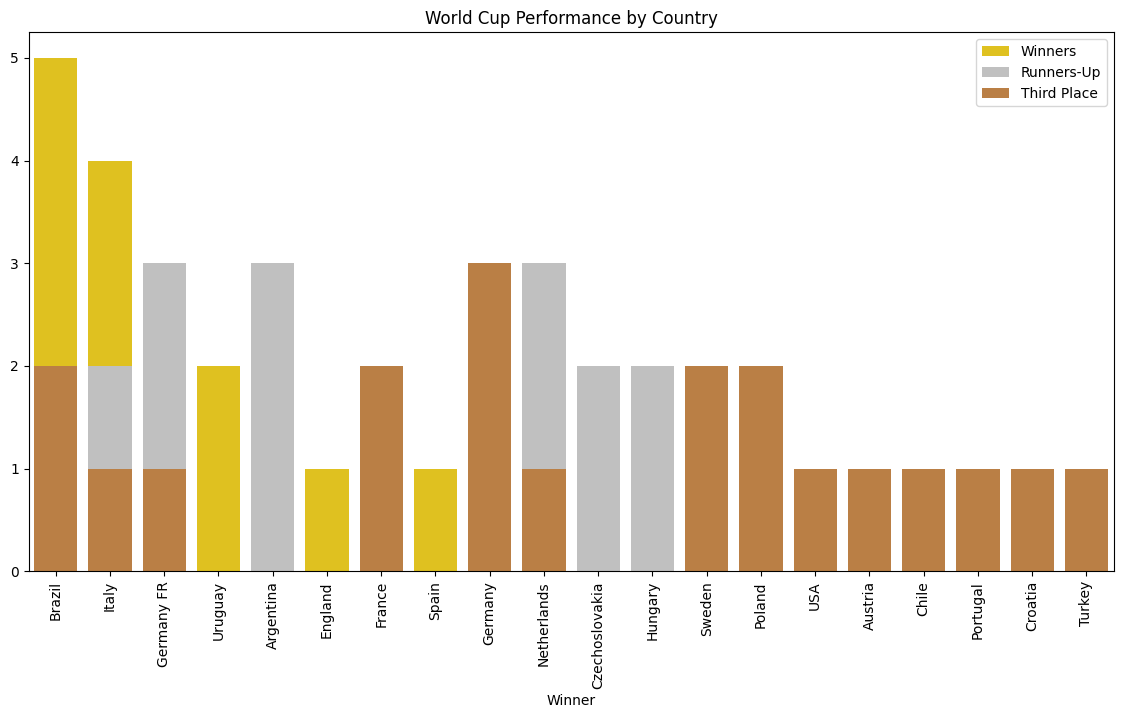

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Winners, Runners-up, and Third Place counts
winners = world_cups['Winner'].value_counts()
runners_up = world_cups['Runners-Up'].value_counts()
third_place = world_cups['Third'].value_counts()

# Visualization
plt.figure(figsize=(14, 7))
sns.barplot(x=winners.index, y=winners.values, color='gold', label='Winners')
sns.barplot(x=runners_up.index, y=runners_up.values, color='silver', label='Runners-Up')
sns.barplot(x=third_place.index, y=third_place.values, color='#cd7f32', label='Third Place')
plt.legend()
plt.title('World Cup Performance by Country')
plt.xticks(rotation=90)
plt.show()

**Number of Matches Played City-Wise:**

Visualize the distribution of matches across host cities.

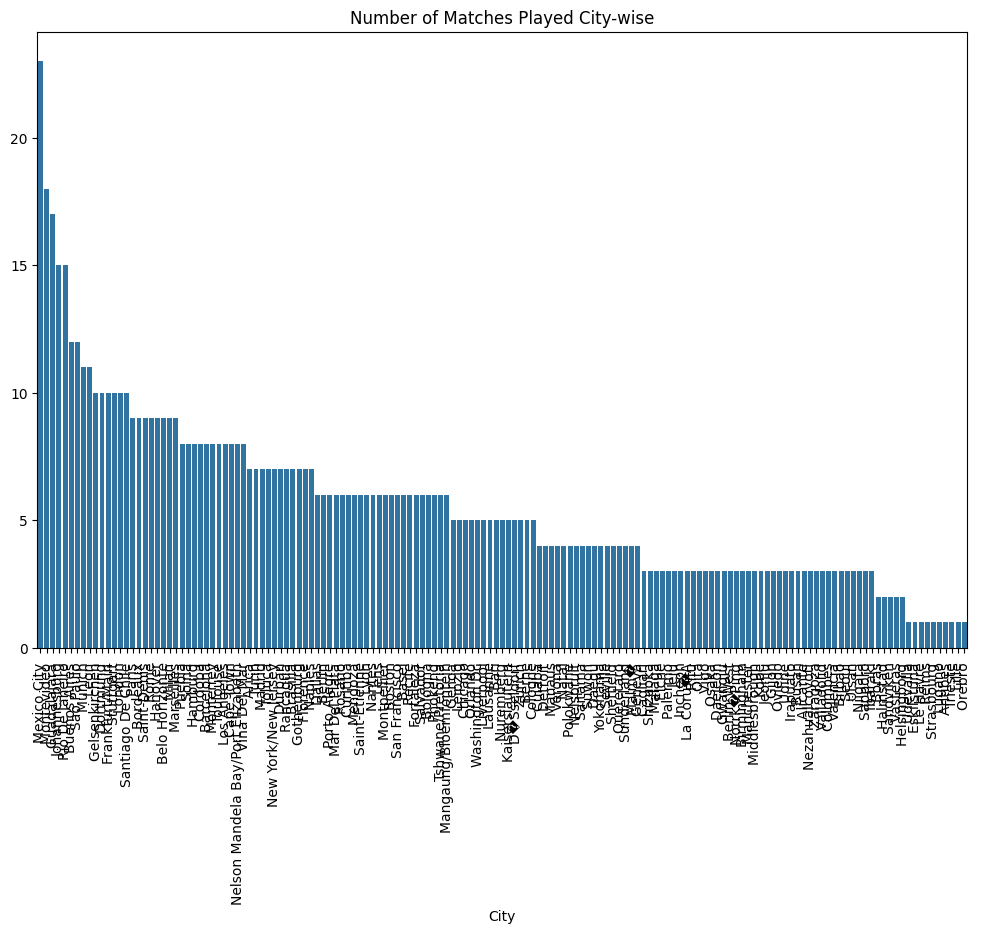

In [94]:
# Number of matches played in each city
city_matches = matches['City'].value_counts()

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=city_matches.index, y=city_matches.values)
plt.title('Number of Matches Played City-wise')
plt.xticks(rotation=90)
plt.show()

**Attendance per Year:**

Examine attendance trends over the years.

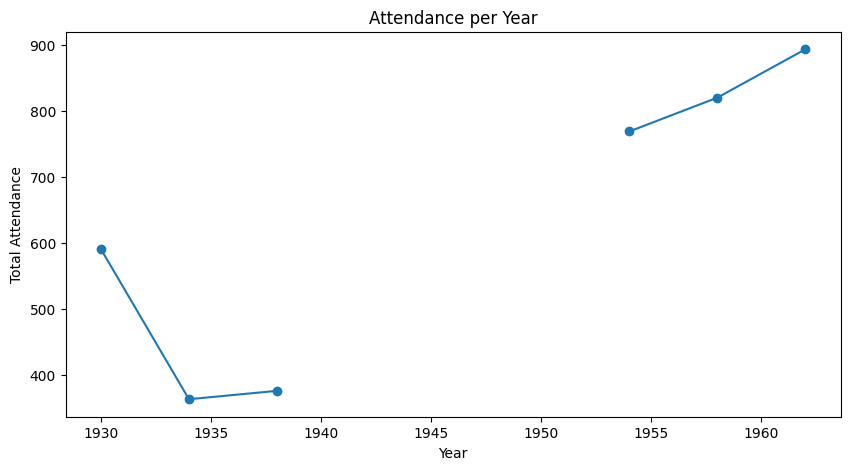

In [95]:
# Total attendance per year
attendance_per_year = world_cups.groupby('Year')['Attendance'].sum()

# Example data cleaning and conversion
attendance_per_year = pd.to_numeric(attendance_per_year, errors='coerce')

# Plotting
attendance_per_year.plot(kind='line', marker='o', title='Attendance per Year', figsize=(10, 5))
plt.ylabel('Total Attendance')
plt.show()

**Goals Scored per Year:**

Analyze goal-scoring trends across tournaments.

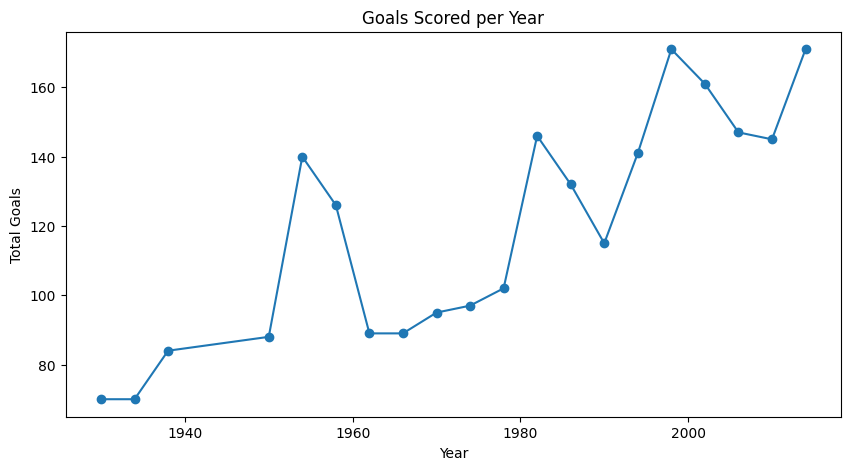

In [96]:
# Total goals scored per year
goals_per_year = world_cups.groupby('Year')['GoalsScored'].sum()

# Visualization
goals_per_year.plot(kind='line', marker='o', title='Goals Scored per Year', figsize=(10, 5))
plt.ylabel('Total Goals')
plt.show()

**Goals Scored by Top Teams:**

<ipython-input-97-a51248ac2158>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_goals.index, y=top_teams_goals.values, palette='Spectral')


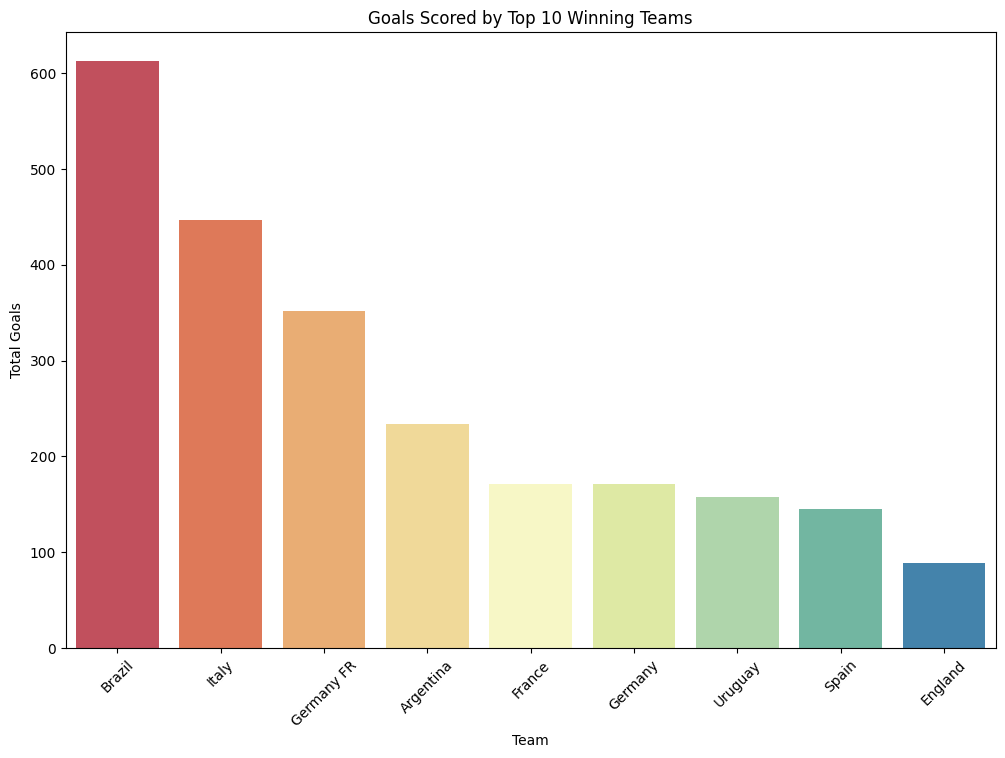

In [97]:
# Aggregate goals scored by top 10 teams
top_teams_goals = world_cups.groupby('Winner')['GoalsScored'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_teams_goals.index, y=top_teams_goals.values, palette='Spectral')
plt.title('Goals Scored by Top 10 Winning Teams')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()

**Number of Qualified Teams per Year:**
Evaluate the number of teams participating in each tournament.

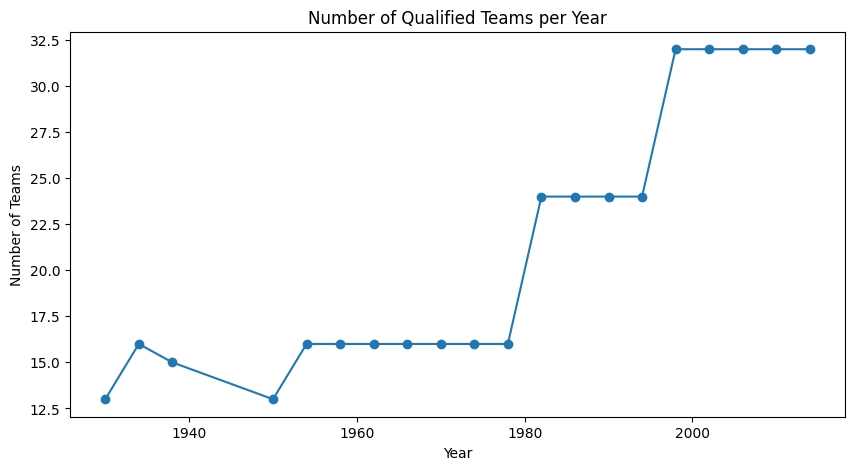

In [98]:
# Number of teams that qualified per year
teams_per_year = world_cups.groupby('Year')['QualifiedTeams'].sum()

# Visualization
teams_per_year.plot(kind='line', marker='o', title='Number of Qualified Teams per Year', figsize=(10, 5))
plt.ylabel('Number of Teams')
plt.show()

**Match-wise Attendance per Year:**

Assess average match attendance year by year.

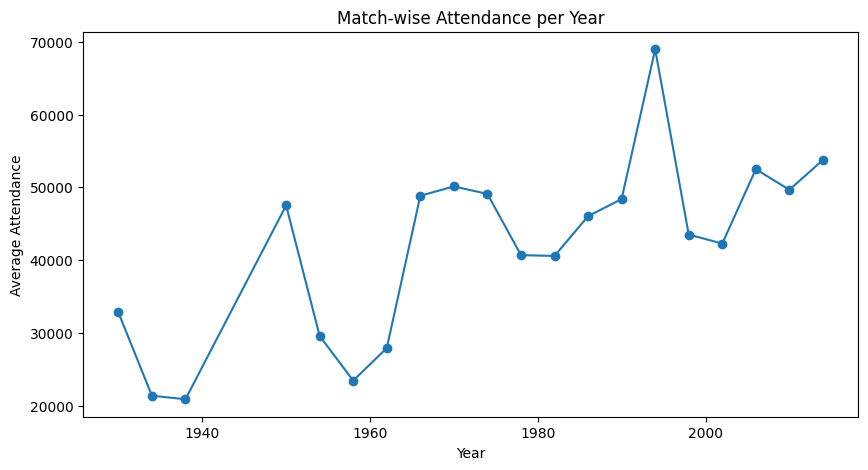

In [99]:
# Average match attendance per year
match_attendance_per_year = matches.groupby('Year')['Attendance'].mean()

# Visualization
match_attendance_per_year.plot(kind='line', marker='o', title='Match-wise Attendance per Year', figsize=(10, 5))
plt.ylabel('Average Attendance')
plt.show()

**Maximum Average Attendance Stadium-Wise:**

Identify stadiums with the highest average attendance.

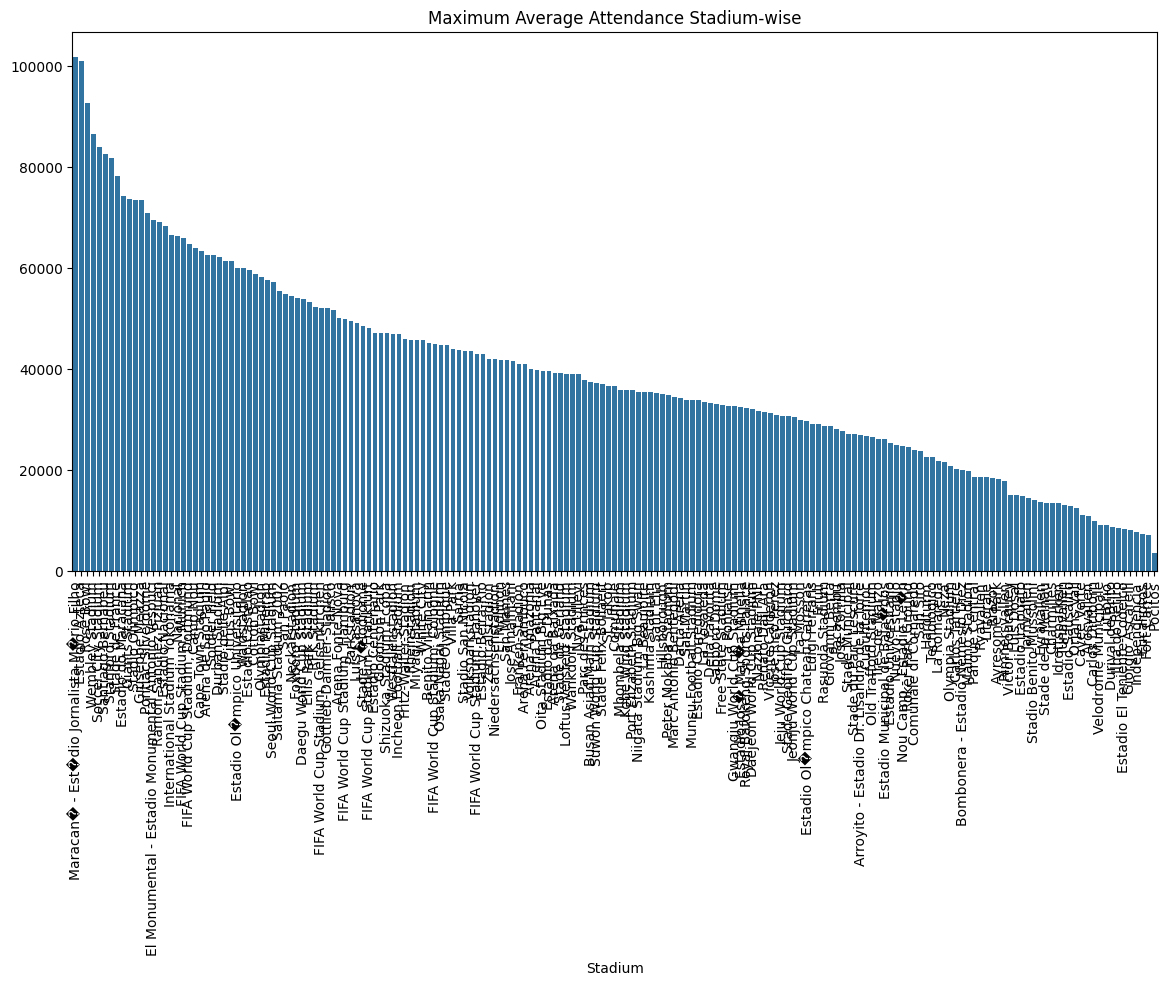

In [100]:
# Average attendance per stadium
stadium_attendance = matches.groupby('Stadium')['Attendance'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(14, 7))
sns.barplot(x=stadium_attendance.index, y=stadium_attendance.values)
plt.title('Maximum Average Attendance Stadium-wise')
plt.xticks(rotation=90)
plt.show()

**Distribution of Matches by Stage:**

<ipython-input-101-2af2b00137eb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attendance_by_stage.index, y=attendance_by_stage.values, palette='Set3')


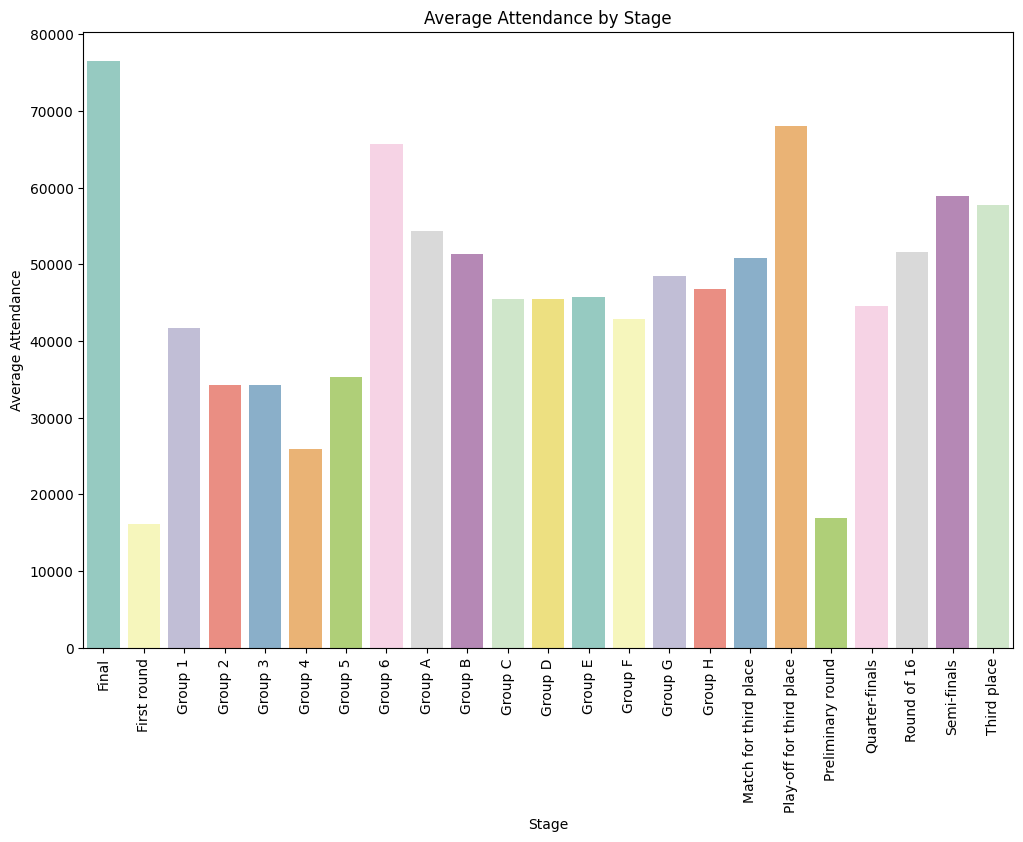

In [101]:
# Calculate average attendance by stage
attendance_by_stage = matches.groupby('Stage')['Attendance'].mean()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=attendance_by_stage.index, y=attendance_by_stage.values, palette='Set3')
plt.title('Average Attendance by Stage')
plt.xlabel('Stage')
plt.ylabel('Average Attendance')
plt.xticks(rotation=90)
plt.show()

**Player Event Distribution:**

<ipython-input-102-3df12d8ea390>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Set2')


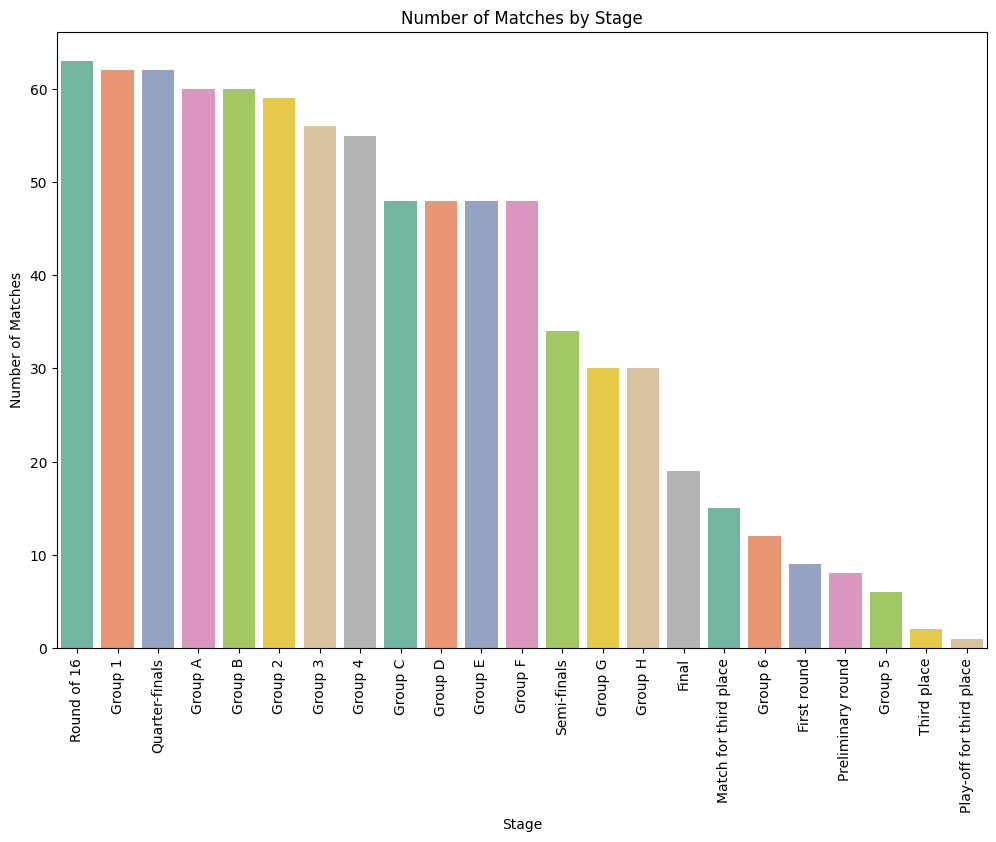

In [102]:
# Count the number of matches by stage
stage_counts = matches['Stage'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Set2')
plt.title('Number of Matches by Stage')
plt.xlabel('Stage')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

**Home Goals vs. Away Goals:**

Compare the distribution of goals scored by home and away teams.

<ipython-input-103-9b97b28d1d10>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='coolwarm')


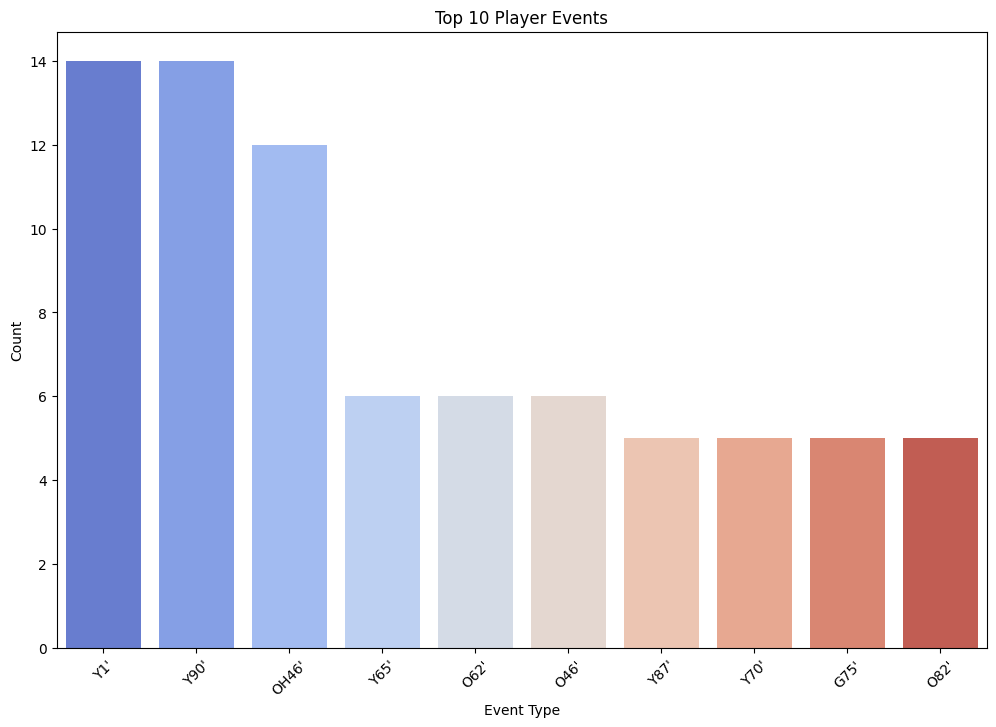

In [103]:
# Count the events by type
event_counts = players['Event'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='coolwarm')
plt.title('Top 10 Player Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Distribution of Goals per Year by Home and Away Teams:**

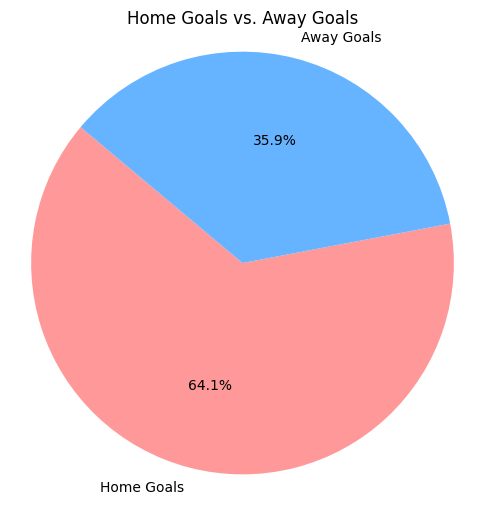

In [104]:
# Home and away goals
home_goals = matches['Home Team Goals'].sum()
away_goals = matches['Away Team Goals'].sum()

# Visualization
plt.figure(figsize=(6, 6))
labels = ['Home Goals', 'Away Goals']
sizes = [home_goals, away_goals]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Home Goals vs. Away Goals')
plt.show()

**Top Scorers Analysis:**

Identify the top goal scorers in World Cup history.

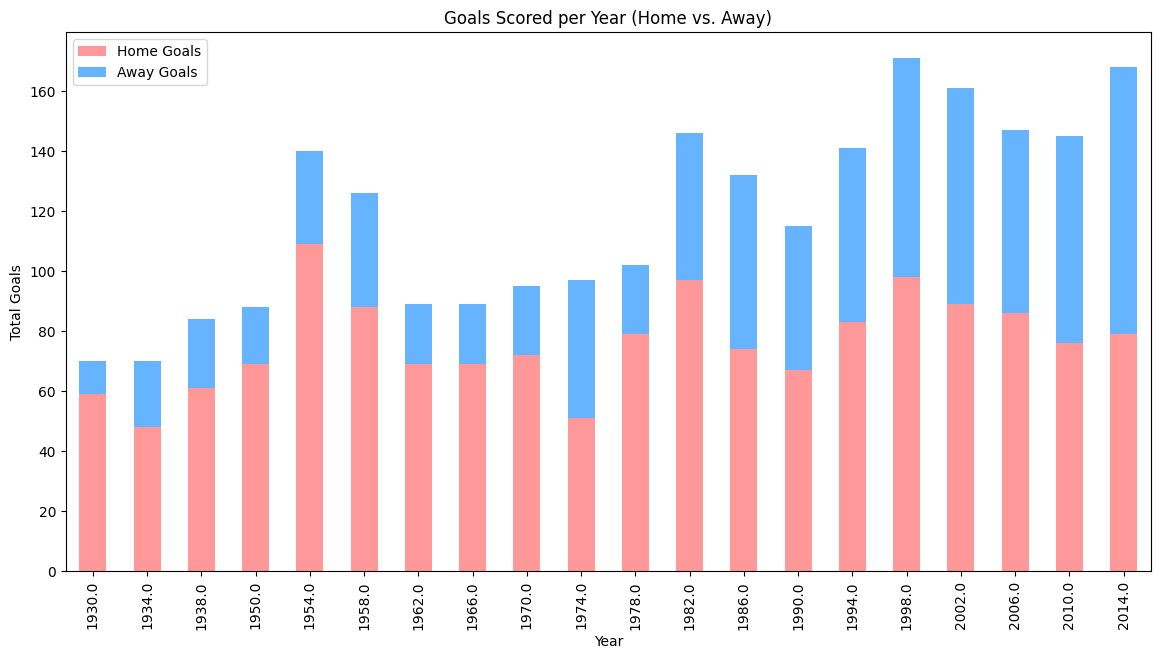

In [105]:
# Group by year and sum the goals for home and away teams
goals_per_year = matches.groupby('Year')[['Home Team Goals', 'Away Team Goals']].sum()

# Plotting
goals_per_year.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#ff9999', '#66b3ff'])
plt.title('Goals Scored per Year (Home vs. Away)')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.legend(['Home Goals', 'Away Goals'])
plt.show()

**Player Performance Metrics:**

Evaluate player performance metrics such as goals scored and matches played.

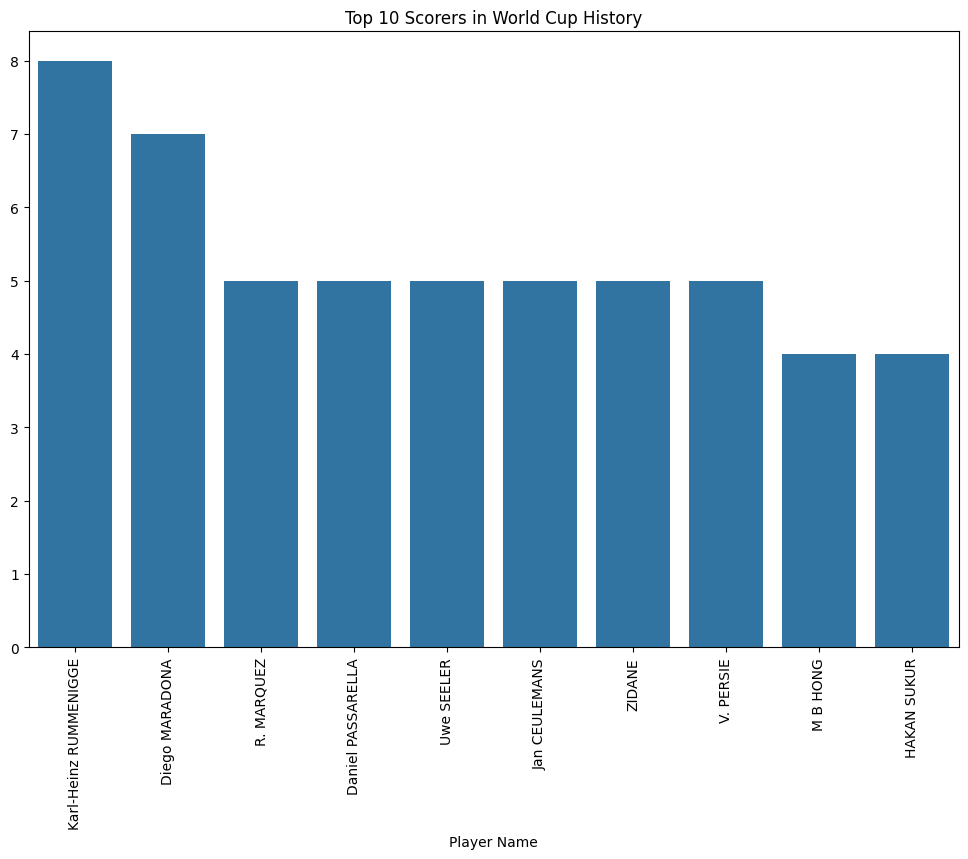

In [106]:
# Top scorers in the World Cup history
top_scorers = players['Player Name'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_scorers.index, y=top_scorers.values)
plt.title('Top 10 Scorers in World Cup History')
plt.xticks(rotation=90)
plt.show()

###**Step 5: Machine Learning**

- **Predictive Modeling:** Build a machine learning model to predict match outcomes based on features like goals scored, attendance, and more.
- **Model Training and Evaluation:** Train a Random Forest Classifier, Hist Gradient Boosting Classifier and evaluate its accuracy.

<ipython-input-107-ff684658a81e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y='GoalsScored', data=top_players, palette='viridis')


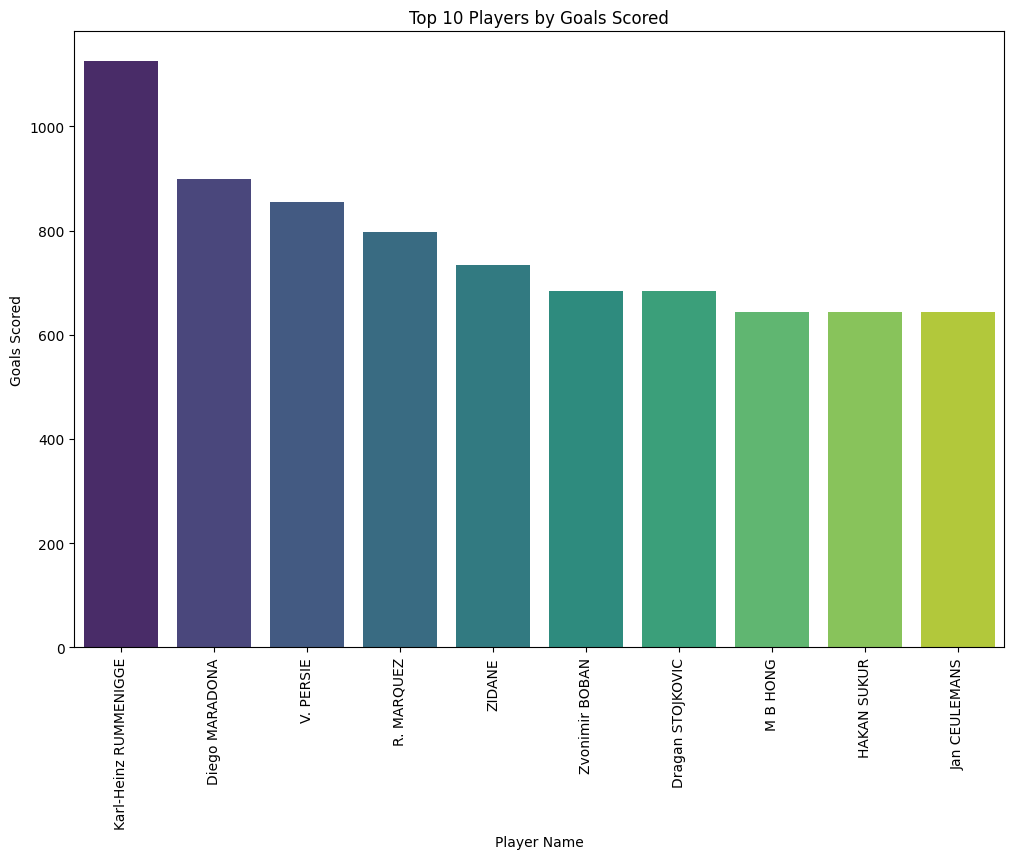

<ipython-input-107-ff684658a81e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y='MatchesPlayed', data=top_players, palette='viridis')


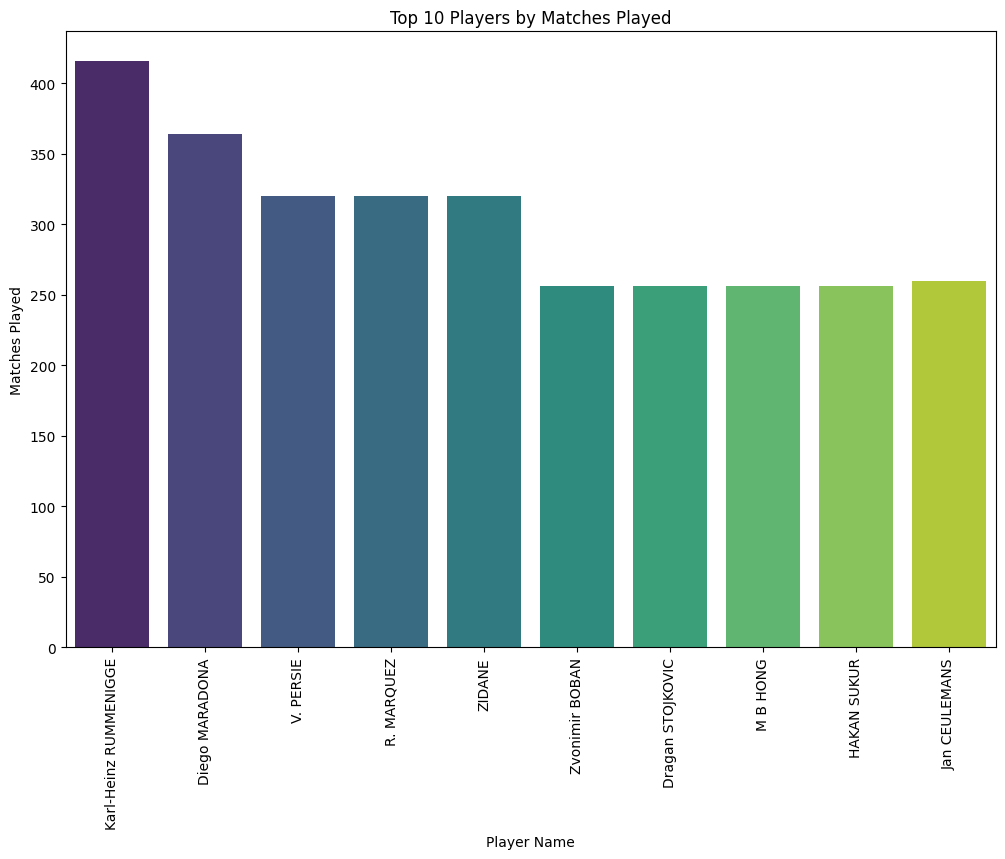

In [107]:
# Merge players with matches on 'MatchID'
players_matches = pd.merge(players, matches, on='MatchID')

# Merge the result with world_cups on 'Year'
merged_data = pd.merge(players_matches, world_cups, on='Year')

# Aggregate data to get the top 10 players by goals scored
top_players = merged_data.groupby('Player Name').agg({
    'GoalsScored': 'sum',
    'MatchesPlayed': 'sum'
}).sort_values(by='GoalsScored', ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_players.index, y='GoalsScored', data=top_players, palette='viridis')
plt.title('Top 10 Players by Goals Scored')
plt.xlabel('Player Name')
plt.ylabel('Goals Scored')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=top_players.index, y='MatchesPlayed', data=top_players, palette='viridis')
plt.title('Top 10 Players by Matches Played')
plt.xlabel('Player Name')
plt.ylabel('Matches Played')
plt.xticks(rotation=90)
plt.show()

In [108]:
# import necessary libraries for Prediction
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Merge players with matches on 'Year'
match = pd.merge(matches, world_cups, on='Year')

# Example to replace non-numeric values with NaN (if using pandas)
match['Attendance_y'] = pd.to_numeric(match['Attendance_y'], errors='coerce')

# Prepare features and labels
features = match[['Home Team Goals', 'Away Team Goals', 'Attendance_y']]
labels = match['Home Team Name'] == match['Winner']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
# Fit SimpleImputer and pass feature names
imputer.fit(features)
X_imputed = imputer.transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, labels, test_size=0.2, random_state=42)

# Train RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train HistGradientBoostingClassifier
hist_model = HistGradientBoostingClassifier()
hist_model.fit(X_train, y_train)

# Impute missing values for test set
X_test_imputed = imputer.transform(X_test)

# Predict with RandomForestClassifier
y_pred_rf = rf_model.predict(X_test_imputed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of RandomForestClassifier: {accuracy_rf:.2f}")

# Predict with HistGradientBoostingClassifier
y_pred_hist = hist_model.predict(X_test_imputed)
accuracy_hist = accuracy_score(y_test, y_pred_hist)
print(f"Accuracy of HistGradientBoostingClassifier: {accuracy_hist:.2f}")

Accuracy of RandomForestClassifier: 0.89
Accuracy of HistGradientBoostingClassifier: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


###**Step 6: Key Insights**
- Visualization of team performances highlights dominant teams in World Cup history.
- Attendance analysis reveals trends and fluctuations over the years.
- Goal analysis helps understand scoring patterns and influential players.
- Machine learning model provides a predictive framework for match outcomes.

###**Step 7: Conclusion**
This project provides a comprehensive analysis of FIFA World Cup data, uncovering significant trends and patterns. By leveraging data visualization and machine learning techniques, we gain deeper insights into the tournament's dynamics. The analysis not only highlights historical trends but also offers predictive insights for future tournaments.

###**Step 8: Future Work**
Future improvements can include:
- Incorporating more advanced machine learning models.
- Adding more features for predictive modeling.
- Extending the analysis to include more recent tournaments.

###***Thank Q, for your time!***